In [1]:
!python3 --version

Python 3.7.0


In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv("zoo.csv",sep=",",header="infer")

In [120]:
df.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Unique number of high level classes

In [121]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

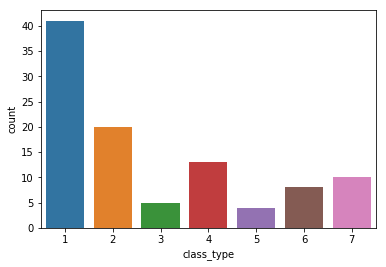

In [122]:
sns.countplot(df['class_type'],label="Count")
plt.show()

In [123]:
df['animal_name'] = df.animal_name.astype("category").cat.codes

# Performing agglomerative clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

In [125]:
from sklearn.utils import shuffle
#df = shuffle(df)

In [126]:
feature16df = df.iloc[:,1:17]
labeldf = df.iloc[:,17:18]

In [127]:
aggloclustering = AgglomerativeClustering(n_clusters=7)

In [128]:
aggloclustering.fit(feature16df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=7,
            pooling_func='deprecated')

In [129]:
cluster_labels = []
for i in range(0,len(aggloclustering.labels_)):
    i = aggloclustering.labels_[i] + 1
    cluster_labels.append(i)

In [130]:
aggloclustering.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3])

In [131]:
cluster_labels

[2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 4,
 3,
 7,
 1,
 1,
 4,
 2,
 3,
 3,
 4,
 4,
 2,
 4,
 1,
 6,
 6,
 5,
 2,
 5,
 1,
 2,
 5,
 4,
 3,
 2,
 2,
 4,
 3,
 1,
 1,
 4,
 1,
 4,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 6,
 1,
 2,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 7,
 6,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 3,
 5,
 7,
 7,
 4,
 4,
 7,
 7,
 3,
 4,
 5,
 1,
 3,
 4,
 1,
 6,
 6,
 6,
 3,
 5,
 2,
 4,
 5,
 1,
 2,
 7,
 4]

# Calculating rmse and accuracy score

In [115]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [116]:
mean_squared_error(labeldf,aggloclustering.labels_)

7.673267326732673

In [117]:
accuracy_score(labeldf,aggloclustering.labels_)

0.33663366336633666